In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import tkinter as tk
import tkinter.filedialog as fd
import numpy as np

root = tk.Tk()
root.withdraw()
path = fd.askopenfilename(parent=root,initialdir="D:/ML/data/1to48/",title='파일 선택')
print(path)

class CycleSelect:
    def __init__(self,path):
        self.data = pd.read_csv(path)
    def onecycleshow(self,cycle):
        if cycle>max(self.data['Cycle_Index']):
            print('cycle 값이 너무 큽니다.')

        else:
            iscycledata = self.data['Cycle_Index'] == cycle
            self.cycledata = self.data[iscycledata]

    def rangecycleshow(self,lowcycle, highcycle):
        if lowcycle<0 or highcycle>max(self.data['Cycle_Index']):
            print('cycle 값이 범위 밖입니다.')

        else:
            lowcycledata = self.data['Cycle_Index'] >= lowcycle
            highcycledata = self.data['Cycle_Index'] <= highcycle
            self.rangecycledata =self.data[lowcycledata & highcycledata]
            
    def onestepshow(self,step, cycle):
        if step>max(self.data['Step_Index']):
            print('step 값이 너무 큽니다.')

        else:
            cycledata = self.data['Cycle_Index'] == cycle
            isstepdata = self.data['Step_Index'] == step
            self.stepdata = self.data[isstepdata & cycledata]


def onecycle_plot_make(cycledata):
    time=cycledata.iloc[:,2]-cycledata.iloc[0,2]
    plt.scatter(time,cycledata.iloc[:,6],s=3,alpha=0.3,c='black') # x축은 시간 y축은 I
    plt.title('Time-Current')
    plt.xlabel('time(s)')
    plt.ylabel('Current')
    plt.show()
    plt.clf()
    plt.scatter(time,cycledata.iloc[:,7],s=3,alpha=0.3,c='black') # x축은 시간 y축은 V
    plt.title('Time-Voltage')
    plt.xlabel('time(s)')
    plt.ylabel('Voltage')
    plt.show()
    plt.clf()
    plt.scatter(time,cycledata.iloc[:,14],s=3,alpha=0.3,c='black') # x축은 시간 y축은 T
    plt.title('Time-Temperature')
    plt.xlabel('time(s)')
    plt.ylabel('Temperature')
    plt.show()
    plt.clf()
    V = cycledata.iloc[:, 7]
    I = cycledata.iloc[:, 6]
    p= abs(np.array(V)*np.array(I))
    plt.scatter(time,p,s=3,alpha=0.3,c='black') # x축은 시간 y축은 T
    plt.title('Time-Power')
    plt.xlabel('time(s)')
    plt.ylabel('Power')
    plt.show()
    plt.clf()

    plt.scatter(time,cycledata.iloc[:,6],s=3,alpha=0.3,c='red',label='Current')
    plt.scatter(time,cycledata.iloc[:,7],s=3,alpha=0.3,c='blue',label='Volt') # x축은 시간 y축은 V
    plt.scatter(time,cycledata.iloc[:,-1],s=3,alpha=0.3,c='green',label='Temp') # x축은 시간 y축은 T
    plt.scatter(time,p,s=3,alpha=0.3,c='black',label='P') # x축은 시간 y축은 T
    plt.legend()
    plt.show()
    plt.clf()


D:/ML/data/1to48/2017-06-30_1C-4per_6C_CH9.csv


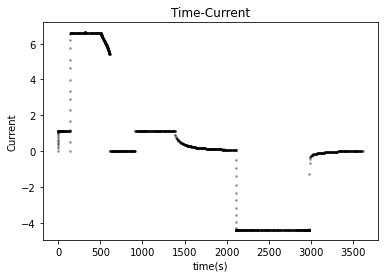

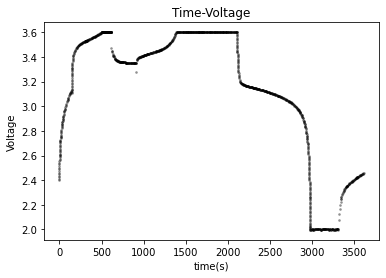

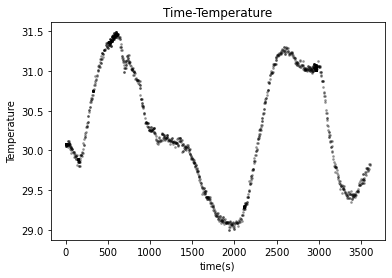

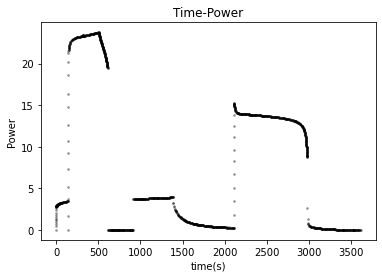

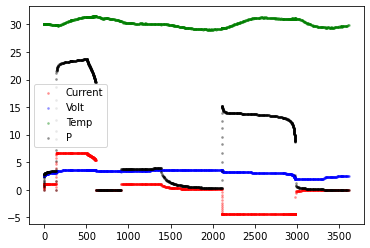

<Figure size 432x288 with 0 Axes>

In [62]:
# 한개 싸이클 에서 C,V,T,P 관찰.

cycle0=CycleSelect(path)
cycle0.onecycleshow(1) # 이 숫자에 해당하는 cycle 관찰
onecycle_plot_make(cycle0.cycledata)

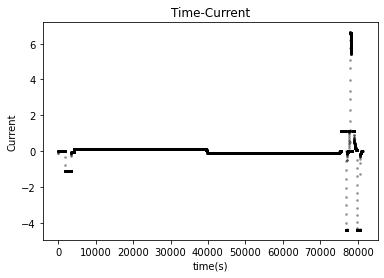

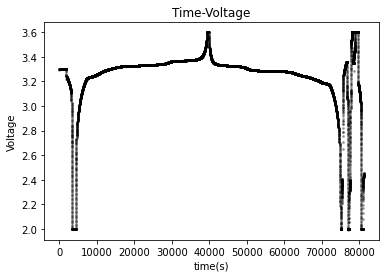

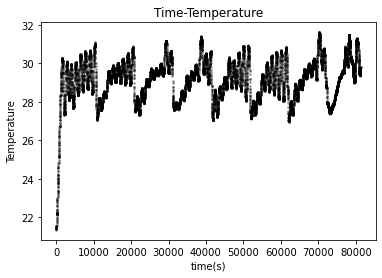

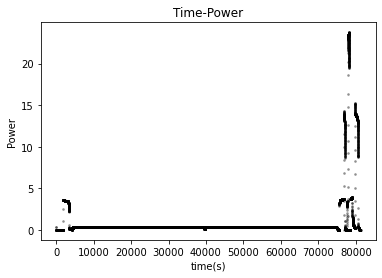

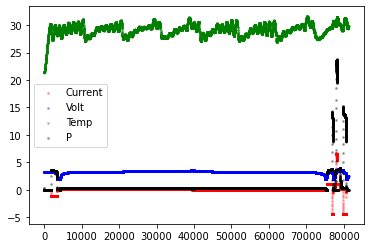

<Figure size 432x288 with 0 Axes>

In [46]:
# 특정 범위 싸이클에서 C,V,T,P 관찰.

cycle0.rangecycleshow(0,1) # 1~6 cycle 관찰
onecycle_plot_make(cycle0.rangecycledata)

cycle:1
step:7


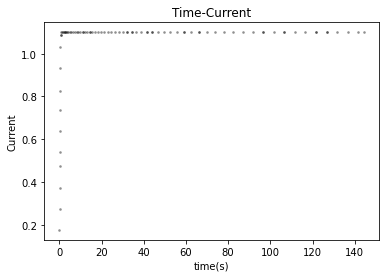

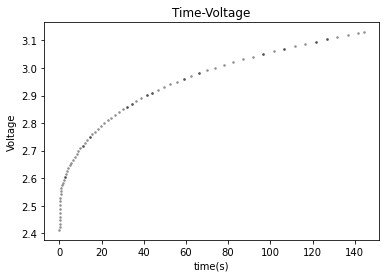

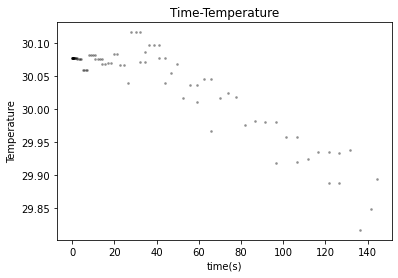

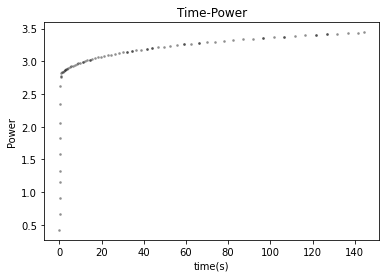

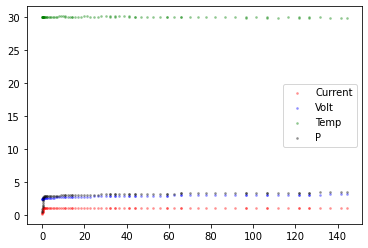

<Figure size 432x288 with 0 Axes>

In [83]:
# step 관찰 step, cycle 값을 변경해주면 원하는 그래프를 얻을 수 있다.

step=7
cycle=1
cycle0.onestepshow(step,cycle)
print(f'cycle:{cycle}')
print(f'step:{step}')
onecycle_plot_make(cycle0.stepdata)

In [95]:
time=np.array(cycle0.stepdata.iloc[:, 2] - cycle0.stepdata.iloc[0, 2])
print(time)

[0.00000000e+00 5.15999794e-02 1.13399982e-01 1.71200037e-01
 2.06799984e-01 2.64299870e-01 3.22999954e-01 3.74699831e-01
 4.35499907e-01 4.93999958e-01 5.59399843e-01 6.86599970e-01
 8.79899979e-01 1.18429995e+00 1.54919982e+00 2.00109982e+00
 2.47869992e+00 2.47879982e+00 3.00349998e+00 3.55289984e+00
 4.21639991e+00 4.90759993e+00 5.65949988e+00 6.43560004e+00
 7.26199985e+00 8.11599994e+00 9.04049993e+00 9.96210003e+00
 1.09605000e+01 1.09605999e+01 1.20462000e+01 1.31374998e+01
 1.43025000e+01 1.43025999e+01 1.55414999e+01 1.68413999e+01
 1.82567999e+01 1.96949999e+01 2.12128000e+01 2.28336999e+01
 2.45616999e+01 2.62721999e+01 2.81106000e+01 3.01011000e+01
 3.21394999e+01 3.21396000e+01 3.42995000e+01 3.42995999e+01
 3.65251999e+01 3.88741000e+01 4.13637998e+01 4.13638999e+01
 4.39775999e+01 4.39777000e+01 4.66209002e+01 4.95279999e+01
 5.25576999e+01 5.56689000e+01 5.89233999e+01 5.89234998e+01
 6.23669999e+01 6.59540000e+01 6.59540999e+01 6.98420999e+01
 7.37886000e+01 7.781909

[0.1245, 0.051599979400634766, 0.06180000305175781, 0.0578000545501709, 0.03559994697570801, 0.05749988555908203, 0.0587000846862793, 0.05169987678527832, 0.06080007553100586, 0.058500051498413086, 0.0653998851776123, 0.12720012664794922, 0.1933000087738037, 0.3043999671936035, 0.3648998737335205, 0.45190000534057617, 0.47760009765625, 9.989738464355469e-05, 0.5247001647949219, 0.5493998527526855, 0.6635000705718994, 0.6912000179290771, 0.7518999576568604, 0.7761001586914062, 0.8263998031616211, 0.8540000915527344, 0.9244999885559082, 0.9216001033782959, 0.9983999729156494, 9.989738464355469e-05, 1.0856001377105713, 1.0912997722625732, 1.1650002002716064, 9.989738464355469e-05, 1.2388999462127686, 1.2999000549316406, 1.4154000282287598, 1.4381999969482422, 1.5178000926971436, 1.6208999156951904, 1.7279999256134033, 1.7105000019073486, 1.83840012550354, 1.9904999732971191, 2.0383999347686768, 0.00010013580322265625, 2.159899950027466, 9.989738464355469e-05, 2.225600004196167, 2.34890007

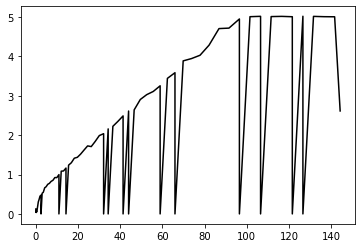

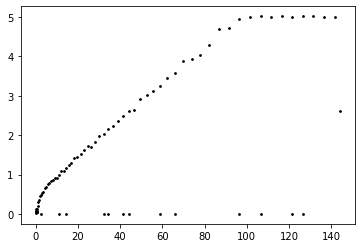

In [96]:
timeinterval=[time[x]-time[x-1] for x in range(len(time)) if not x==0]
timeinterval.insert(0,cycle0.stepdata.iloc[0, 3])
print(timeinterval)
plt.plot(time,timeinterval,c='black')
plt.clf
plt.show()
plt.scatter(time,timeinterval,c='black',s=3)
plt.show()

In [101]:
time_in=np.array(timeinterval)
delete_site=np.where(time_in<0.001)
time_in=np.delete(time_in,delete_site)
time_ti=np.array(time)
time_ti=np.delete(time_ti,delete_site)
#print(time_in,time_ti)

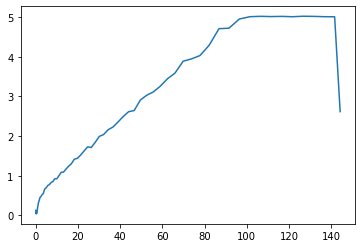

In [102]:
plt.plot(time_ti,time_in)